In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm

In [4]:
df = pd.read_csv("Data_to_Transform.csv")
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


## Логарифмічна трансформація

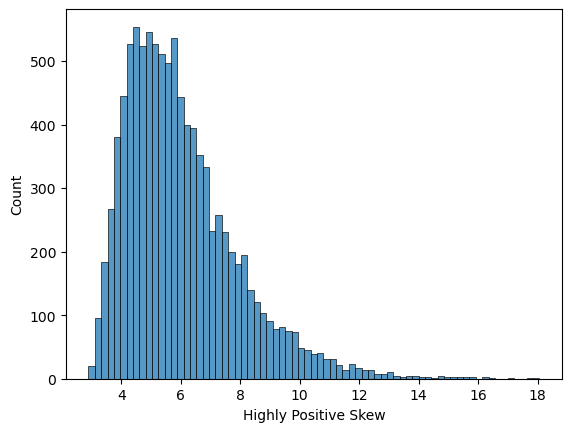

<Figure size 640x480 with 0 Axes>

In [25]:
# Highly Positive Skew зараз сильно зміщена вліво до логарифмічної трансформації
sns.histplot(df['Highly Positive Skew'])
fig = plt.figure()

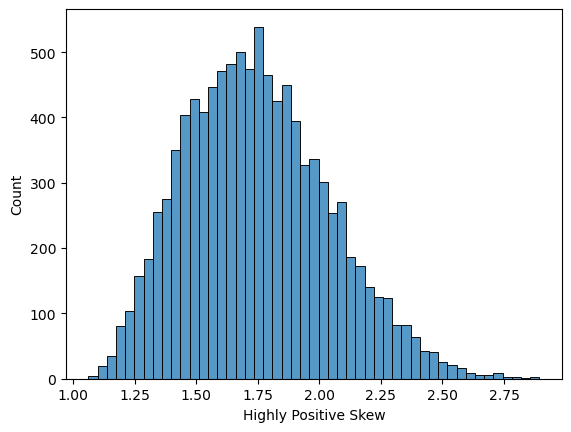

<Figure size 640x480 with 0 Axes>

In [26]:
# Після логарифмічної трансформації бачимо що приблизно вкладається в нормальний розподіл
df_log = np.log(df['Highly Positive Skew'])
sns.histplot(df_log)
fig = plt.figure()

## Трансформація кубічним коренем

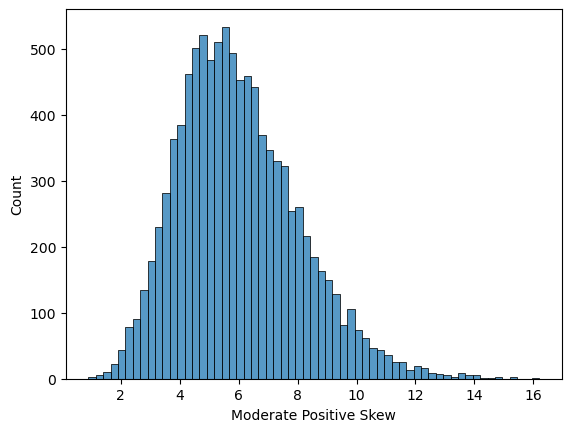

<Figure size 640x480 with 0 Axes>

In [13]:
# Для трансформації кубічним коренем я обрав дані Moderate Positive Skew, так як вони не сильно зміщені вліво
sns.histplot(df['Moderate Positive Skew'])
fig = plt.figure()

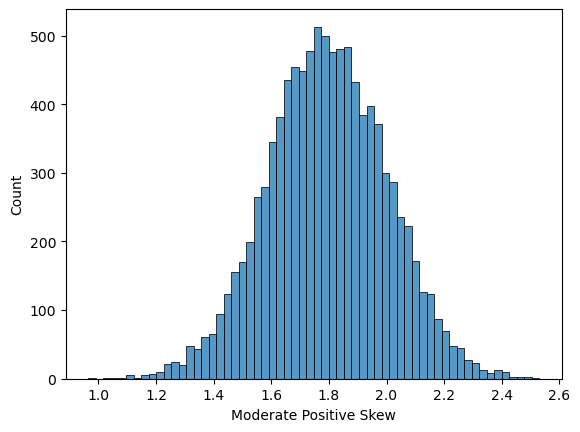

<Figure size 640x480 with 0 Axes>

In [14]:
# І після трансформації ми бачимо, що тепер приблизно вкладаємось в нормальний розподіл
df_cbrt = np.cbrt(df['Moderate Positive Skew'])
sns.histplot(df_cbrt)
fig = plt.figure()

## Трансформація Бокса-Кокса

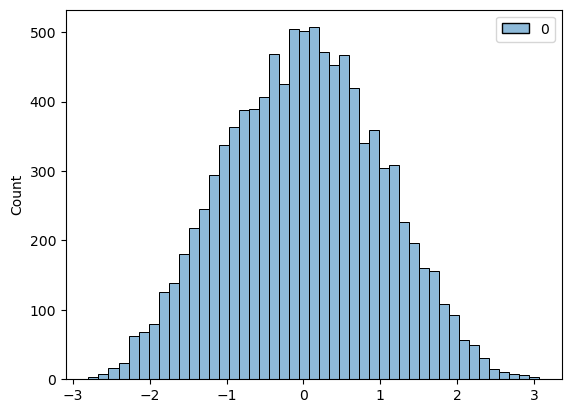

<Figure size 640x480 with 0 Axes>

In [18]:
# Так як цей метод обираэться для найбільш зміщенних вправо даних, то обираємо Highly Positive Skew
data = df['Highly Positive Skew'].values.reshape(-1, 1)
pt = PowerTransformer(method='box-cox')
data = pt.fit_transform(data)
sns.histplot(data)
fig = plt.figure()

## Оцінка нормальності розподілу через Q-Q plot

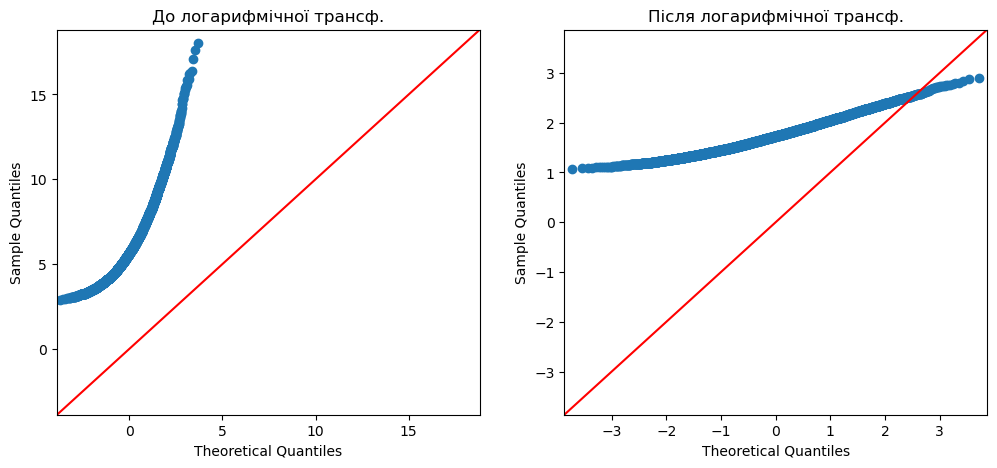

In [44]:
# Оцінка логарифмічної трансформації для 'Highly Positive Skew'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sm.qqplot(df['Highly Positive Skew'], line='45', ax=ax[0])
ax[0].set_title("До логарифмічної трансф.")

sm.qqplot(df_log, line='45', ax=ax[1])
ax[1].set_title("Після логарифмічної трансф.")

plt.show()

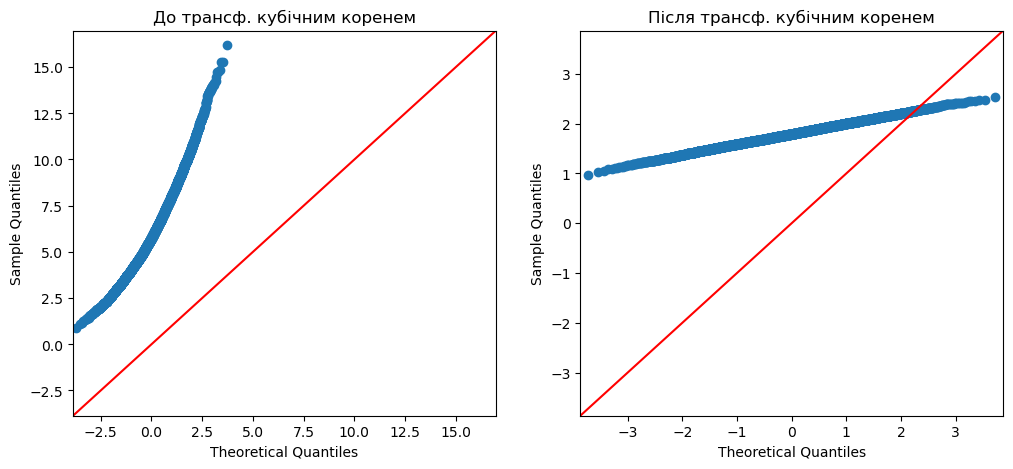

In [45]:
# Оцінка трансформації кубічним коренем для 'Moderate Positive Skew'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sm.qqplot(df['Moderate Positive Skew'], line='45', ax=ax[0])
ax[0].set_title("До трансф. кубічним коренем")

sm.qqplot(df_cbrt, line='45', ax=ax[1])
ax[1].set_title("Після трансф. кубічним коренем")

plt.show()

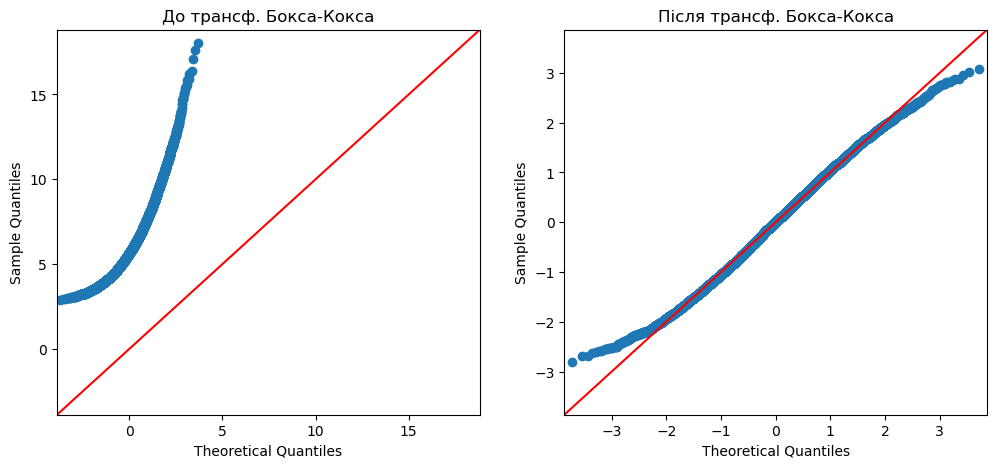

In [46]:
# Оцінка трансформації Бокса-Кокса для 'Highly Positive Skew'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sm.qqplot(df['Highly Positive Skew'], line='45', ax=ax[0])
ax[0].set_title("До трансф. Бокса-Кокса")

sm.qqplot(data, line='45', ax=ax[1])
ax[1].set_title("Після трансф. Бокса-Кокса")

plt.show()

In [ ]:
#  Отже з графіків видно, що кожна трансформація наближила дані до нормального розподілу, а трансформація Бокса-Кокса
# фактично дала нам нормальний розподіл.